In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(type(x_train))

<class 'numpy.ndarray'>


In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


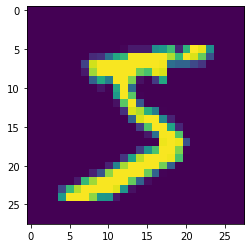

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

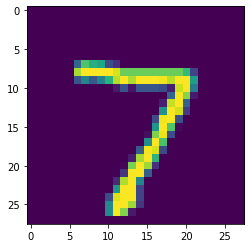

In [7]:
plt.imshow(x_test[0])

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784, )),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [10]:
# 预处理数据
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [11]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4836 - accuracy: 0.8478
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1409 - accuracy: 0.9577
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1103 - accuracy: 0.9670
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0880 - accuracy: 0.9741
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0754 - accuracy: 0.9762
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0736 - accuracy: 0.9778
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0633 - accuracy: 0.9801
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0599 - accuracy: 0.9825
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0553 - accuracy: 0.9827
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.048

In [12]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0900 - accuracy: 0.9793


[0.08996416628360748, 0.9793000221252441]

In [13]:
model.fit(x_train, y_train, epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0119 - val_accuracy: 0.9966
Epoch 2/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0139 - val_accuracy: 0.9955
Epoch 3/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 0.0169 - val_accuracy: 0.9946
Epoch 4/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0165 - val_accuracy: 0.9943
Epoch 5/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0208 - val_accuracy: 0.9942
Epoch 6/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0243 - val_accuracy: 0.9923
Epoch 7/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.0343 - val_accuracy:

In [14]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1081 - accuracy: 0.9818


[0.10810133069753647, 0.9818000197410583]

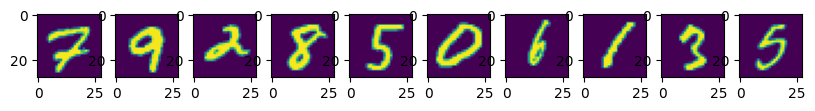

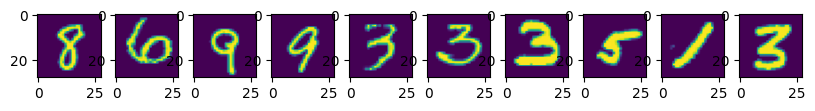

In [16]:
import numpy as np

(xo_train, yo_train), (xo_test, yo_test) = tf.keras.datasets.mnist.load_data()

def plot_random10(mnist_data, title):
    """
    get 10 randomly from mnist data and draw
    """
    fig = plt.figure(figsize=(28, 28), dpi=100)
    fig.suptitle(title, fontsize=18, x=0, y=0.92)
    for index, x in enumerate(mnist_data[np.random.choice(np.arange(0, len(mnist_data)), 10, replace=False)], 1):
        ax = fig.add_subplot(28, 28, index)
        plt.imshow(x)

plot_random10(xo_train, 'Train set')
plot_random10(xo_test, 'Test set')

In [17]:
model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0252 - accuracy: 0.9930 - val_loss: 0.0387 - val_accuracy: 0.9908
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0240 - accuracy: 0.9934 - val_loss: 0.0490 - val_accuracy: 0.9885
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9931 - val_loss: 0.0400 - val_accuracy: 0.9894
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0226 - accuracy: 0.9937 - val_loss: 0.0489 - val_accuracy: 0.9886
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.0467 - val_accuracy: 0.9888
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.0457 - val_accuracy: 0.9897
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0216 - accuracy: 0.9945 - val_loss: 0.0465 - val_ac

In [18]:
prediction = model.predict(x_test)

In [19]:
print(prediction[0])

[0.0000000e+00 2.1980921e-23 1.5593056e-15 9.6956675e-22 1.7605622e-20
 2.0571826e-28 0.0000000e+00 1.0000000e+00 5.8661265e-32 4.1049291e-17]


In [20]:
print(np.argmax(prediction[0]))

7


In [21]:
np.argmax(y_test[0])

7